In [4]:
import pandas as pd
import numpy as np
import datetime

Load in and combine datasets

In [3]:
past_match_1 = pd.read_csv('Match_Stats_1_of_2.csv')
past_match_2 = pd.read_csv('Match_Stats_2_of_2.csv')
champions_2023_match = pd.read_csv('Champions_Tour_2023_Match_Stats.csv')

past_player_stat_1 = pd.read_csv('Player_Stats_1_of_2.csv')
past_player_stat_2 = pd.read_csv('Player_Stats_2_of_2.csv')
champions_2023_player = pd.read_csv('Champions_Tour_2023_Player_Stats.csv')

C:\Users\kimje\AppData\Local\Temp\ipykernel_18956\2390242526.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  past_player_stat_2 = pd.read_csv('Player_Stats_2_of_2.csv')


In [4]:
Map_Stats = pd.concat([past_match_1, past_match_2, champions_2023_match], axis=0)
Map_Stats = Map_Stats.drop_duplicates()
Map_Stats = Map_Stats.reset_index(drop=True)

Player_Stats = pd.concat([past_player_stat_1, past_player_stat_2, champions_2023_player], axis=0)
Player_Stats = Player_Stats.drop_duplicates()
Player_Stats = Player_Stats.reset_index(drop=True)

In [5]:
Map_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9826 non-null   int64  
 1   Date         9826 non-null   object 
 2   Patch        9826 non-null   object 
 3   Format       9826 non-null   object 
 4   match_url    9826 non-null   object 
 5   Maps_Won_1   9826 non-null   int64  
 6   Maps_Won_2   9826 non-null   int64  
 7   Map Number   9826 non-null   int64  
 8   Map          9735 non-null   object 
 9   Duration     9735 non-null   object 
 10  Team1        9735 non-null   object 
 11  RoundsWon1   9735 non-null   float64
 12  Team2        9735 non-null   object 
 13  RoundsWon2   9735 non-null   float64
 14  PistolWin1   9735 non-null   float64
 15  PistolWin2   9735 non-null   float64
 16  EcoWin1      9735 non-null   object 
 17  Ecowin2      9735 non-null   object 
 18  SemiEcoWin1  9735 non-null   object 
 19  SemiEc

In [6]:
Player_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96759 entries, 0 to 96758
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       96759 non-null  object 
 1   Patch      96759 non-null  object 
 2   Format     96759 non-null  object 
 3   match_url  96759 non-null  object 
 4   Map        95975 non-null  object 
 5   Duration   95975 non-null  object 
 6   Team_#     96759 non-null  int64  
 7   Player     95975 non-null  object 
 8   Agent      96759 non-null  object 
 9   Rating     95975 non-null  object 
 10  ACS        95975 non-null  float64
 11  Kills      95975 non-null  float64
 12  Deaths     95975 non-null  object 
 13  Assists    95975 non-null  float64
 14  KD         95975 non-null  object 
 15  KAST       95975 non-null  object 
 16  ADR        95975 non-null  float64
 17  HeadShot   95975 non-null  object 
 18  FK         95975 non-null  float64
 19  FD         95975 non-null  float64
 20  FK-FD 

# Data Cleaning

In [7]:
def percentage_to_decimal(percentage_str):
    return float(percentage_str.strip('%')) / 100

def win_percentage(numerator, denominator):
    if int(denominator) == 0:
        return 0.0
    else:
        return float(numerator) / float(denominator)

In [8]:
Player_Stats['Date'] = pd.to_datetime(Player_Stats['Date'])

Player_Stats[['Player', 'Team']] = Player_Stats['Player'].str.split('\n', expand=True)
Player_Stats['Team'] = Player_Stats['Team'].str.replace('\n', '')
Player_Stats[['Map', 'Pick']] = Player_Stats['Map'].str.split('\n', expand=True)
Player_Stats.drop('Pick', axis=1, inplace=True)
Map_Stats[['Map', 'Pick']] = Map_Stats['Map'].str.split('\n', expand=True)
Map_Stats.drop('Pick', axis=1, inplace=True)

Player_Stats.dropna(subset=['HeadShot', 'KD', 'Rating'], inplace=True)
Player_Stats = Player_Stats[(Player_Stats['HeadShot'] != ' ') & (Player_Stats['Rating'] != ' ')]
Player_Stats['KD'] = Player_Stats['KD'].astype(float)
Player_Stats['Rating'] = Player_Stats['Rating'].astype(float)

Player_Stats['Deaths'] = Player_Stats['Deaths'].str.replace('/', '')
Player_Stats['KAST'] = Player_Stats['KAST'].apply(percentage_to_decimal)
Player_Stats['HeadShot'] = Player_Stats['HeadShot'].apply(percentage_to_decimal)

Player_Stats['Role'] = Player_Stats['Agent'].apply(lambda x: 'Controller' if x in ['Omen', 'Astra', 'Brimstone', 'Viper', 'Harbor'] else
                                            'Sentinel' if x in ['Cypher', 'Killjoy'] else
                                            'Initiator' if x in ['Sova', 'Breach', 'Gekko', 'Skye', 'Kayo'] else
                                            'Duelist' if x in ['Phoenix', 'Jett', 'Neon', 'Reyna', 'Raze', 'Yoru', 'Chamber'] else
                                            'Sage') 

Merge in Match Data into Player Data

In [9]:
Player_Stats = Player_Stats.merge(Map_Stats[['match_url', 'Team1', 'Team2', 'Map', 'Maps_Won_1','Maps_Won_2', 'RoundsWon1', 'RoundsWon2', 'PistolWin1', 'PistolWin2', 'EcoWin1', 'Ecowin2','SemiEcoWin1', 'SemiEcoWin2', 'SemiBuyWin1', 'SemiBuyWin2', 'BuyWin1', 'BuyWin2']], 
                               on=['match_url', 'Map'], 
                               how='left')

Player_Stats['Maps_Won'] = Player_Stats.apply(lambda x: x.Maps_Won_1 if x['Team_#'] == 1 else x.Maps_Won_2, axis=1)
Player_Stats['Rounds_Won'] = Player_Stats.apply(lambda x: x.RoundsWon1 if x['Team_#'] == 1 else x.RoundsWon2, axis=1)
Player_Stats['Pistol_Won'] = Player_Stats.apply(lambda x: x.PistolWin1 if x['Team_#'] == 1 else x.PistolWin2, axis=1)
Player_Stats['Eco_Buy'] = Player_Stats.apply(lambda x: x.EcoWin1 if x['Team_#'] == 1 else x.Ecowin2, axis=1)
Player_Stats['SemiEco'] = Player_Stats.apply(lambda x: x.SemiEcoWin1 if x['Team_#'] == 1 else x.SemiEcoWin2, axis=1)
Player_Stats['SemiBuy'] = Player_Stats.apply(lambda x: x.SemiBuyWin1 if x['Team_#'] == 1 else x.SemiBuyWin2, axis=1)
Player_Stats['Full_Buy'] = Player_Stats.apply(lambda x: x.BuyWin1 if x['Team_#'] == 1 else x.BuyWin2, axis=1)
Player_Stats['Opposing_Team'] = Player_Stats.apply(lambda x: x.Team2 if x['Team_#'] == 1 else x.Team1, axis=1)
Player_Stats['Current_Team'] = Player_Stats.apply(lambda x: x.Team1 if x['Team_#'] == 1 else x.Team2, axis=1)

Player_Stats = Player_Stats.drop(['Maps_Won_1','Maps_Won_2', 'RoundsWon1', 'RoundsWon2', 'PistolWin1', 'PistolWin2', 'EcoWin1', 'Ecowin2','SemiEcoWin1', 'SemiEcoWin2', 'SemiBuyWin1', 'SemiBuyWin2', 'BuyWin1', 'BuyWin2'], axis=1).dropna()


for x in ['Eco_Buy', 'SemiEco', 'SemiBuy', 'Full_Buy']:
    # split each Economy stat column into two separate columns
    Player_Stats[['denominator', 'numerator']] = Player_Stats[x].str.split(r'\s*\(\s*', expand=True)
    # remove the closing parenthesis from the second column
    Player_Stats['numerator'] = Player_Stats['numerator'].str.rstrip(')')
    # Apply the function to the two columns using apply
    Player_Stats[x] = Player_Stats.apply(lambda row: win_percentage(row['numerator'], row['denominator']), axis=1)
    # drop the numerator and denominator columns
    Player_Stats.drop(columns=['numerator', 'denominator'], axis=1, inplace=True)

In [10]:
Player_Stats

,Date,Patch,Format,match_url,Map,Duration,Team_#,Player,Agent,Rating,...,Team2,Maps_Won,Rounds_Won,Pistol_Won,Eco_Buy,SemiEco,SemiBuy,Full_Buy,Opposing_Team,Current_Team
0,2023-03-21 16:00:00,Patch 6.03,BO3,https://www.vlr.gg/184642/team-liquid-brazil-v...,Haven,44:50,1,Bizerra,Sova,1.83,...,MIBR Female,2.0,13.0,2.0,1.0,0.0,0.8,0.583333,MIBR Female,Team Liquid Brazil
1,2023-03-21 16:00:00,Patch 6.03,BO3,https://www.vlr.gg/184642/team-liquid-brazil-v...,Haven,44:50,1,bstrdd,Jett,1.25,...,MIBR Female,2.0,13.0,2.0,1.0,0.0,0.8,0.583333,MIBR Female,Team Liquid Brazil
2,2023-03-21 16:00:00,Patch 6.03,BO3,https://www.vlr.gg/184642/team-liquid-brazil-v...,Haven,44:50,1,Joojina,Omen,1.14,...,MIBR Female,2.0,13.0,2.0,1.0,0.0,0.8,0.583333,MIBR Female,Team Liquid Brazil
3,2023-03-21 16:00:00,Patch 6.03,BO3,https://www.vlr.gg/184642/team-liquid-brazil-v...,Haven,44:50,1,daiki,Breach,1.05,...,MIBR Female,2.0,13.0,2.0,1.0,0.0,0.8,0.583333,MIBR Female,Team Liquid Brazil
4,2023-03-21 16:00:00,Patch 6.03,BO3,https://www.vlr.gg/184642/team-liquid-brazil-v...,Haven,44:50,1,isaa,Killjoy,0.89,...,MIBR Female,2.0,13.0,2.0,1.0,0.0,0.8,0.583333,MIBR Female,Team Liquid Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96663,2023-05-16 06:30:00,Patch 6.08,BO3,https://www.vlr.gg/184502/rex-regum-qeon-vs-pa...,Pearl,57:23,2,d4v41,Skye,1.47,...,Paper Rex,2.0,13.0,2.0,1.0,0.0,0.5,0.500000,Rex Regum Qeon,Paper Rex
96664,2023-05-16 06:30:00,Patch 6.08,BO3,https://www.vlr.gg/184502/rex-regum-qeon-vs-pa...,Pearl,57:23,2,mindfreak,Astra,1.17,...,Paper Rex,2.0,13.0,2.0,1.0,0.0,0.5,0.500000,Rex Regum Qeon,Paper Rex
96665,2023-05-16 06:30:00,Patch 6.08,BO3,https://www.vlr.gg/184502/rex-regum-qeon-vs-pa...,Pearl,57:23,2,Jinggg,Phoenix,1.09,...,Paper Rex,2.0,13.0,2.0,1.0,0.0,0.5,0.500000,Rex Regum Qeon,Paper Rex
96666,2023-05-16 06:30:00,Patch 6.08,BO3,https://www.vlr.gg/184502/rex-regum-qeon-vs-pa...,Pearl,57:23,2,f0rsakeN,Killjoy,0.92,...,Paper Rex,2.0,13.0,2.0,1.0,0.0,0.5,0.500000,Rex Regum Qeon,Paper Rex


# Feature Engineering

In [11]:
# Calculate the average performance for opposing team over the past N games
avg_opposing_stats = Player_Stats.groupby(['Date', 'Opposing_Team']).mean()

opposing_avg_3 = avg_opposing_stats.groupby(['Opposing_Team'])['Kills','Rating', 'ACS', 'Assists', 'KD', 'KAST', 'ADR','HeadShot', 'FK', 'FD', 'FK-FD', 'Maps_Won', 'Rounds_Won', 'Pistol_Won',
       'Eco_Buy', 'SemiEco', 'SemiBuy', 'Full_Buy'].transform(lambda s: s.shift(1).rolling(window=3, min_periods=1).mean())

Player_Stats = Player_Stats.merge(opposing_avg_3, on=['Date', 'Opposing_Team'], how = 'left', suffixes=('', '_opposing_avg_3'))

# Add kill average per map per role column
avg_kills_by_map = Player_Stats[['Role', 'Map','Kills']].groupby(['Role', 'Map'])['Kills'].mean().reset_index()
Player_Stats = Player_Stats.merge(avg_kills_by_map, on=['Role', 'Map'], how = 'left', suffixes=('', '_role_map_avg'))

# Merge in map number so order is maintained when finding rolling average
map_number = Map_Stats[['match_url', 'Map', 'Map Number']]
Player_Stats = Player_Stats.merge(map_number, on=['match_url', 'Map'], how = 'left')

for x in ['Rating', 'ACS', 'Kills', 'Deaths', 'Assists', 'KD', 'KAST', 'ADR', 'HeadShot', 'FK', 'FD', 'FK-FD', 'Maps_Won','Rounds_Won', 'Pistol_Won', 'Eco_Buy', 'SemiEco', 'SemiBuy', 'Full_Buy']:
    #Sort df to find rolling average stats per player per role
    Player_Stats = Player_Stats.sort_values(by=['Player', 'Role', 'Date', 'Map Number'], ignore_index=True)
    Player_Stats[f'Last3_Avg_{x}_By_Player_by_Role'] = Player_Stats.groupby(['Player', 'Role'], sort=False)[x].transform(lambda s: s.shift(1).rolling(window=3, min_periods=1).mean()).reset_index(drop=['Player'])
    Player_Stats[f'Last5_Avg_{x}_By_Player_by_Role'] = Player_Stats.groupby(['Player', 'Role'], sort=False)[x].transform(lambda s: s.shift(1).rolling(window=5, min_periods=1).mean()).reset_index(drop=['Player'])
    Player_Stats[f'Last7_Avg_{x}_By_Player_by_Role'] = Player_Stats.groupby(['Player', 'Role'], sort=False)[x].transform(lambda s: s.shift(1).rolling(window=7, min_periods=1).mean()).reset_index(drop=['Player'])
   
    #Sort df to find rolling average stats per player
    Player_Stats = Player_Stats.sort_values(by=['Player', 'Date', 'Map Number'], ignore_index=True)
    Player_Stats[f'Last3_{x}_By_Player'] = Player_Stats.groupby(['Player'], sort=False)[x].transform(lambda s: s.shift(1).rolling(window=3, min_periods=1).mean()).reset_index(drop=['Player'])
    Player_Stats[f'Last5_{x}_By_Player'] = Player_Stats.groupby(['Player'], sort=False)[x].transform(lambda s: s.shift(1).rolling(window=5, min_periods=1).mean()).reset_index(drop=['Player'])
    Player_Stats[f'Last7_{x}_By_Player'] = Player_Stats.groupby(['Player'], sort=False)[x].transform(lambda s: s.shift(1).rolling(window=7, min_periods=1).mean()).reset_index(drop=['Player'])

    #Previous Match Stats
    Player_Stats[f'Last_Match_{x}_By_Player'] = Player_Stats.groupby(['Player'], sort=False)[x].transform(lambda s: s.shift(1))
    

Player_Stats['Num_Matches'] = Player_Stats.groupby(['Player', 'Role'])['Player'].transform('count')

C:\Users\kimje\AppData\Local\Temp\ipykernel_19436\56476417.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_opposing_stats = Player_Stats.groupby(['Date', 'Opposing_Team']).mean()
C:\Users\kimje\AppData\Local\Temp\ipykernel_19436\56476417.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  opposing_avg_3 = avg_opposing_stats.groupby(['Opposing_Team'])['Kills','Rating', 'ACS', 'Assists', 'KD', 'KAST', 'ADR','HeadShot', 'FK', 'FD', 'FK-FD', 'Maps_Won', 'Rounds_Won', 'Pistol_Won',
C:\Users\kimje\AppData\Local\Temp\ipykernel_19436\56476417.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

In [18]:
Player_Stats_Final = Player_Stats.copy()
Player_Stats_Final.columns.tolist()

['Date',
 'Patch',
 'Format',
 'match_url',
 'Map',
 'Duration',
 'Team_#',
 'Player',
 'Agent',
 'Rating',
 'ACS',
 'Kills',
 'Deaths',
 'Assists',
 'KD',
 'KAST',
 'ADR',
 'HeadShot',
 'FK',
 'FD',
 'FK-FD',
 'Team',
 'Role',
 'Team1',
 'Team2',
 'Maps_Won',
 'Rounds_Won',
 'Pistol_Won',
 'Eco_Buy',
 'SemiEco',
 'SemiBuy',
 'Full_Buy',
 'Opposing_Team',
 'Current_Team',
 'Kills_opposing_avg_3',
 'Rating_opposing_avg_3',
 'ACS_opposing_avg_3',
 'Assists_opposing_avg_3',
 'KD_opposing_avg_3',
 'KAST_opposing_avg_3',
 'ADR_opposing_avg_3',
 'HeadShot_opposing_avg_3',
 'FK_opposing_avg_3',
 'FD_opposing_avg_3',
 'FK-FD_opposing_avg_3',
 'Maps_Won_opposing_avg_3',
 'Rounds_Won_opposing_avg_3',
 'Pistol_Won_opposing_avg_3',
 'Eco_Buy_opposing_avg_3',
 'SemiEco_opposing_avg_3',
 'SemiBuy_opposing_avg_3',
 'Full_Buy_opposing_avg_3',
 'Kills_role_map_avg',
 'Map Number',
 'Last3_Avg_Rating_By_Player_by_Role',
 'Last5_Avg_Rating_By_Player_by_Role',
 'Last7_Avg_Rating_By_Player_by_Role',
 'Last

In [19]:
Player_Stats_Final = Player_Stats.drop(['Format', 'Patch', 'match_url', 'Duration', 'Team_#', 'Rating', 
                                        'ACS', 'Deaths', 'Assists', 'KD', 'KAST', 'ADR','HeadShot', 'Map Number', 
                                        'Team1', 'Team2', 'Opposing_Team', 'Current_Team', 'FK', 'FD', 'FK-FD',
                                        'Maps_Won','Rounds_Won','Pistol_Won','Eco_Buy','SemiEco','SemiBuy','Full_Buy', 'Role'], axis=1).dropna().reset_index()

Player_Stats_Final = Player_Stats_Final.drop(Player_Stats_Final.columns[0], axis=1)
Player_Stats_Final

,Date,Map,Player,Agent,Kills,Team,Kills_opposing_avg_3,Rating_opposing_avg_3,ACS_opposing_avg_3,Assists_opposing_avg_3,...,Last7_SemiBuy_By_Player,Last_Match_SemiBuy_By_Player,Last3_Avg_Full_Buy_By_Player_by_Role,Last5_Avg_Full_Buy_By_Player_by_Role,Last7_Avg_Full_Buy_By_Player_by_Role,Last3_Full_Buy_By_Player,Last5_Full_Buy_By_Player,Last7_Full_Buy_By_Player,Last_Match_Full_Buy_By_Player,Num_Matches
0,2021-06-26 04:00:00,Split,008,Viper,15.0,NTER,14.900000,0.732000,170.200000,4.900000,...,0.900000,1.000000,0.681818,0.681818,0.681818,0.681818,0.681818,0.681818,0.636364,5
1,2021-06-26 04:00:00,Haven,008,Killjoy,17.0,NTER,14.900000,0.732000,170.200000,4.900000,...,0.686111,0.444444,0.285714,0.285714,0.285714,0.593074,0.626623,0.626623,0.285714,7
2,2021-07-17 05:00:55,Haven,008,Killjoy,18.0,NTER,11.366667,0.761333,170.466667,3.700000,...,0.628889,0.400000,0.500000,0.500000,0.500000,0.619048,0.644156,0.644156,0.714286,7
3,2021-07-17 05:00:55,Ascent,008,Killjoy,16.0,NTER,11.366667,0.761333,170.466667,3.700000,...,0.607407,0.500000,0.564103,0.564103,0.564103,0.564103,0.637163,0.652181,0.692308,7
4,2021-07-17 05:00:55,Split,008,Viper,18.0,NTER,11.366667,0.761333,170.466667,3.700000,...,0.568254,0.333333,0.740260,0.740260,0.740260,0.648352,0.617582,0.635935,0.538462,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76406,2021-11-04 08:35:00,Split,농민봉기,Viper,23.0,VVS,15.200000,1.092111,217.866667,4.555556,...,0.333333,0.333333,0.550000,0.550000,0.550000,0.550000,0.550000,0.550000,0.550000,3
76407,2021-11-04 09:00:00,Breeze,농민봉기,Viper,14.0,VVS,18.200000,0.986000,205.300000,5.500000,...,0.466667,0.600000,0.593182,0.593182,0.593182,0.593182,0.593182,0.593182,0.636364,3
76408,2021-11-04 07:00:00,Icebox,믐기도,Viper,14.0,레.,14.488889,0.869556,188.800000,4.777778,...,0.500000,0.500000,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,3
76409,2021-11-04 09:00:00,Breeze,믐기도,Viper,6.0,레.,17.200000,0.968000,198.800000,6.500000,...,0.250000,0.000000,0.586806,0.586806,0.586806,0.586806,0.586806,0.586806,0.562500,3


Save final dataset and prepare for ML model

In [5]:
#Player_Stats_Final.to_csv('VLR_ML.csv')

Player_Stats_Final = pd.read_csv('VLR_ML.csv')
Player_Stats_Final = Player_Stats_Final.drop(Player_Stats_Final.columns[0], axis=1)
Player_Stats_Final = Player_Stats_Final.sort_values('Date')

In [6]:
Player_Stats_Final['Last_Match_Deaths_By_Player'] = Player_Stats_Final['Last_Match_Deaths_By_Player'].astype(int)
Player_Stats_Final['Date'] = Player_Stats_Final['Date'].astype(str)

numeric_features = Player_Stats_Final.select_dtypes([np.number]).drop(['Kills'], axis=1).columns

categorical_features = Player_Stats_Final.select_dtypes(exclude=[np.number]).columns
categorical_features

Index(['Date', 'Map', 'Player', 'Agent', 'Team'], dtype='object')

This will use Lasso feature selection to determine the number of optimal features

In [7]:
from sklearn.model_selection import train_test_split

# Splitting data into X (features) and y (target)

X = Player_Stats_Final.drop('Kills', axis=1)
y = Player_Stats_Final['Kills']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle= False, random_state=42)

# Splitting the train set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= False, random_state=42)


print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(58454, 158)
(58454,)
(6495, 158)
(6495,)
(11462, 158)
(11462,)


(None, None)

Compare ML models to see the best performer

In [8]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data

,Date,Map,Player,Agent,Team,Kills_opposing_avg_3,Rating_opposing_avg_3,ACS_opposing_avg_3,Assists_opposing_avg_3,KD_opposing_avg_3,...,Last_Match_SemiBuy_By_Player,Last3_Avg_Full_Buy_By_Player_by_Role,Last5_Avg_Full_Buy_By_Player_by_Role,Last7_Avg_Full_Buy_By_Player_by_Role,Last3_Full_Buy_By_Player,Last5_Full_Buy_By_Player,Last7_Full_Buy_By_Player,Last_Match_Full_Buy_By_Player,Num_Matches,Kills
33914,2021-04-01 14:40:00,Bind,Sayf,Killjoy,GLD,12.700000,0.813000,176.400000,4.200000,-4.000000,...,0.80,0.568735,0.568735,0.568735,0.568735,0.568735,0.568735,0.294118,38,9.0
38211,2021-04-01 14:40:00,Split,TakaS,Jett,OPP,14.700000,0.841000,187.000000,5.300000,-2.400000,...,0.40,0.637821,0.637821,0.637821,0.637821,0.637821,0.637821,0.692308,57,22.0
38212,2021-04-01 14:40:00,Bind,TakaS,Raze,OPP,14.700000,0.841000,187.000000,5.300000,-2.400000,...,1.00,0.604701,0.604701,0.604701,0.604701,0.604701,0.604701,0.538462,57,17.0
67551,2021-04-01 14:40:00,Bind,rodeN,Sova,OPP,14.700000,0.841000,187.000000,5.300000,-2.400000,...,1.00,0.637821,0.637821,0.637821,0.604701,0.604701,0.604701,0.538462,50,19.0
33913,2021-04-01 14:40:00,Split,Sayf,Cypher,GLD,12.700000,0.813000,176.400000,4.200000,-4.000000,...,0.40,0.706044,0.706044,0.706044,0.706044,0.706044,0.706044,0.769231,38,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,2022-08-20 17:15:00,Fracture,ChurmZ,Sage,CD,12.333333,0.883667,188.388889,3.866667,-1.644444,...,0.25,0.607143,0.513568,0.490461,0.326007,0.352747,0.424231,0.000000,10,17.0
31139,2022-08-20 17:25:00,Bind,RaM,Skye,PK.A,16.233333,1.106111,212.311111,6.388889,1.222222,...,0.00,0.502859,0.574443,0.550316,0.502859,0.574443,0.550316,0.529412,36,20.0
28628,2022-08-20 17:25:00,Bind,Okeanos,Raze,VRT,16.844444,1.068556,214.444444,6.000000,1.544444,...,0.60,0.522222,0.500000,0.487333,0.522222,0.500000,0.487333,0.533333,40,20.0
5428,2022-08-20 17:25:00,Haven,Blahst,Neon,VRT,16.844444,1.068556,214.444444,6.000000,1.544444,...,0.60,0.527586,0.527586,0.527586,0.455556,0.489885,0.394136,0.533333,6,17.0


In [97]:
from pycaret.regression import setup, compare_models

exp_clf = setup(data = training_data, target='Kills')
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.8887,19.1283,3.6589,0.0760,0.2628,0.2685,235.5330
lightgbm,Light Gradient Boosting Machine,4.0781,26.6751,5.1642,0.1224,0.3710,0.3775,4.7240
gbr,Gradient Boosting Regressor,4.0957,26.8522,5.1813,0.1165,0.3730,0.3810,46.4420
et,Extra Trees Regressor,4.1011,27.1691,5.2117,0.1061,0.3722,0.3763,313.1520
rf,Random Forest Regressor,4.1053,27.0588,5.2013,0.1097,0.3740,0.3815,147.3720
xgboost,Extreme Gradient Boosting,4.1160,27.1726,5.2122,0.1060,0.3728,0.3783,310.6560
en,Elastic Net,4.1785,27.8865,5.2803,0.0825,0.3804,0.3916,10.1800
huber,Huber Regressor,4.1813,28.1499,5.3052,0.0737,0.3780,0.3822,145.4150
omp,Orthogonal Matching Pursuit,4.1857,28.3115,5.3204,0.0684,0.3815,0.3857,12.0040
lasso,Lasso Regression,4.2024,28.1935,5.3092,0.0724,0.3821,0.3938,11.7990


Compare encoders to see the best performer

In [40]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import BayesianRidge



encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    
}

enconder_metrics = pd.DataFrame(columns=['encoder', 'MSE', 'R2', 'MAE'])

for key in encoders:

    categorical_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', encoders[key]())
        ]
    )    

    numeric_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', PowerTransformer(method = 'yeo-johnson'))
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('numerical', numeric_transformer, numeric_features),
            ('categorical', categorical_transformer, categorical_features)
        ]
    )

    pipe = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', BayesianRidge())
        ]
    )

    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    row = {
        'encoder': key,
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

    enconder_metrics = enconder_metrics.append(row, ignore_index=True)


enconder_metrics.head(20).sort_values(by='MAE')

c:\Users\kimje\anaconda3\envs\Deep_Learning\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
c:\Users\kimje\anaconda3\envs\Deep_Learning\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
c:\Users\kimje\anaconda3\envs\Deep_Learning\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Users\kimje\AppData\Local\Temp\ipykernel_19436\3302372577.py:69: FutureWarning:

,encoder,MSE,R2,MAE
3,OneHotEncoder,25.108760,0.160916,3.974239
4,LeaveOneOutEncoder,25.140397,0.159858,3.982283
2,CatBoostEncoder,25.284859,0.155031,3.988452
0,BackwardDifferenceEncoder,25.996259,0.131257,4.042050
1,BaseNEncoder,26.131849,0.126726,4.052680
5,TargetEncoder,26.076088,0.128589,4.056213


We will encode the categorical features and numerically transform the dataframe to result in a numeric array for ML

In [9]:
#Encodes categorical features into numerical
import category_encoders as ce
from sklearn.preprocessing import PowerTransformer

Encoder = ce.CatBoostEncoder(cols=categorical_features)
scaler = PowerTransformer(method = 'yeo-johnson')

#For each set, transform categorical features into numerical features and then scale all the numerical features

train_numeric_dataset = Encoder.fit_transform(X_train, y_train)
train_numeric_dataset = scaler.fit_transform(train_numeric_dataset)

validation_numeric_dataset = Encoder.transform(X_valid)
validation_numeric_dataset = scaler.transform(validation_numeric_dataset)

testing_numeric_dataset = Encoder.transform(X_test)
testing_numeric_dataset = scaler.transform(testing_numeric_dataset)

train_numeric_dataset

array([[  0.04544541,   0.15118782,  -0.07400853, ...,  -0.01770582,
         -1.2606629 ,   0.48243417],
       [ -1.67085946,   0.15118782,  -0.07400853, ...,   0.64523381,
          0.62584544,   0.95132071],
       [  0.33440897, -12.06747203,   1.54477169, ...,   0.32116124,
         -0.16311716,   0.95132071],
       ...,
       [  1.4953755 ,   0.06207085,   1.20671067, ...,  -0.73567406,
         -0.18811234,   0.54018738],
       [  1.95674244,  -0.52819356,   0.38459991, ...,  -1.47708245,
         -0.18811234,  -1.28848271],
       [  1.79416992,  -0.52761054,   0.72171295, ...,  -0.48493636,
         -0.04483143,  -0.10490036]])

Baseline results before PCA feature selection

There are three main metrics for evaluating regression models:

- R Square/Adjusted R Square : R Square measures how well the model explains the variation in the dependent variable.
- Mean Square Error(MSE)/Root Mean Square Error(RMSE): While R Square is a measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness of the fit.
- Mean Absolute Error(MAE): Mean absolute error (MAE) is similar to root mean square error (MSE). However, MAE is taking the sum of the absolute value of the error, rather than the square of the error in MSE.

In [34]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

models = [
    ("Linear Regression", LinearRegression()),
    ("Bayesian Ridge", BayesianRidge()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

results = []

for model_name, model in models:
    model.fit(train_numeric_dataset, y_train)
    predictions = model.predict(validation_numeric_dataset)
    train_score = model.score(train_numeric_dataset, y_train)
    validation_score = model.score(validation_numeric_dataset, y_valid)
    mse = metrics.mean_squared_error(y_valid, predictions)
    mae = metrics.mean_absolute_error(y_valid, predictions)
    results.append([model_name, train_score, validation_score, mae, mse])

# Create a DataFrame to store the results
columns = ["Model", "Train R2 Score", "Validation R2 Score", "Mean Absolute Error", "Mean Squared Error"]
results_df = pd.DataFrame(results, columns=columns)

print(results_df)

               Model  Train R2 Score  Validation R2 Score  \
0  Linear Regression        0.137041             0.156945   
1     Bayesian Ridge        0.136153             0.156185   
2  Gradient Boosting        0.166319             0.161796   

   Mean Absolute Error  Mean Squared Error  
0             3.942503           24.743208  
1             3.945065           24.765494  
2             3.926739           24.600833  


# Use Lasso and PCA to optimize feature selection

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Splitting data into X (features) and y (target)
X_numeric = Player_Stats_Final.drop(['Date', 'Map', 'Player', 'Agent', 'Team', 'Kills'], axis=1)

y = Player_Stats_Final['Kills']

# scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Perform feature selection using Lasso regularization
model = Lasso(alpha=0.01)
sfm = SelectFromModel(model)
X_selected = sfm.fit_transform(X_scaled, y)

# get the selected feature indices and names
feature_idx = sfm.get_support()
feature_names = X_numeric.columns[feature_idx]

# create a new DataFrame with the selected features
data_selected = pd.DataFrame(X_selected, columns=feature_names)
data_selected['Kills'] = y
optimal_features = list(data_selected.columns) + ['Format', 'Map', 'Player', 'Agent', 'Team', 'Role', 'Kills']
print("Optimal number of features: {}".format(len(optimal_features))) 

Optimal number of features: 65


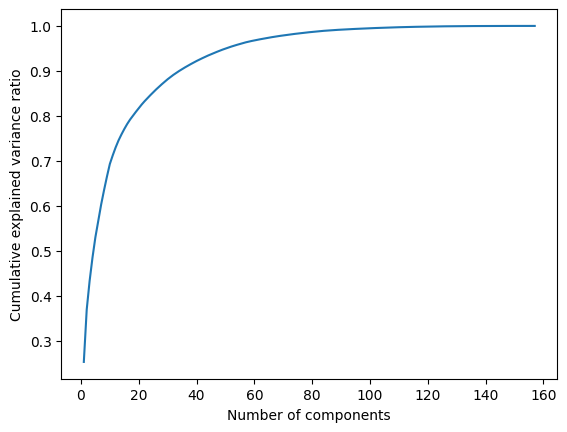

In [27]:
#Now we will optimize for which features will impact our target 'Kills'
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(random_state=42)
pca.fit(train_numeric_dataset)

# Analyze the explained variance ratio and choose the number of components to keep
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plot the cumulative explained variance ratio to help with the selection
plt.plot(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

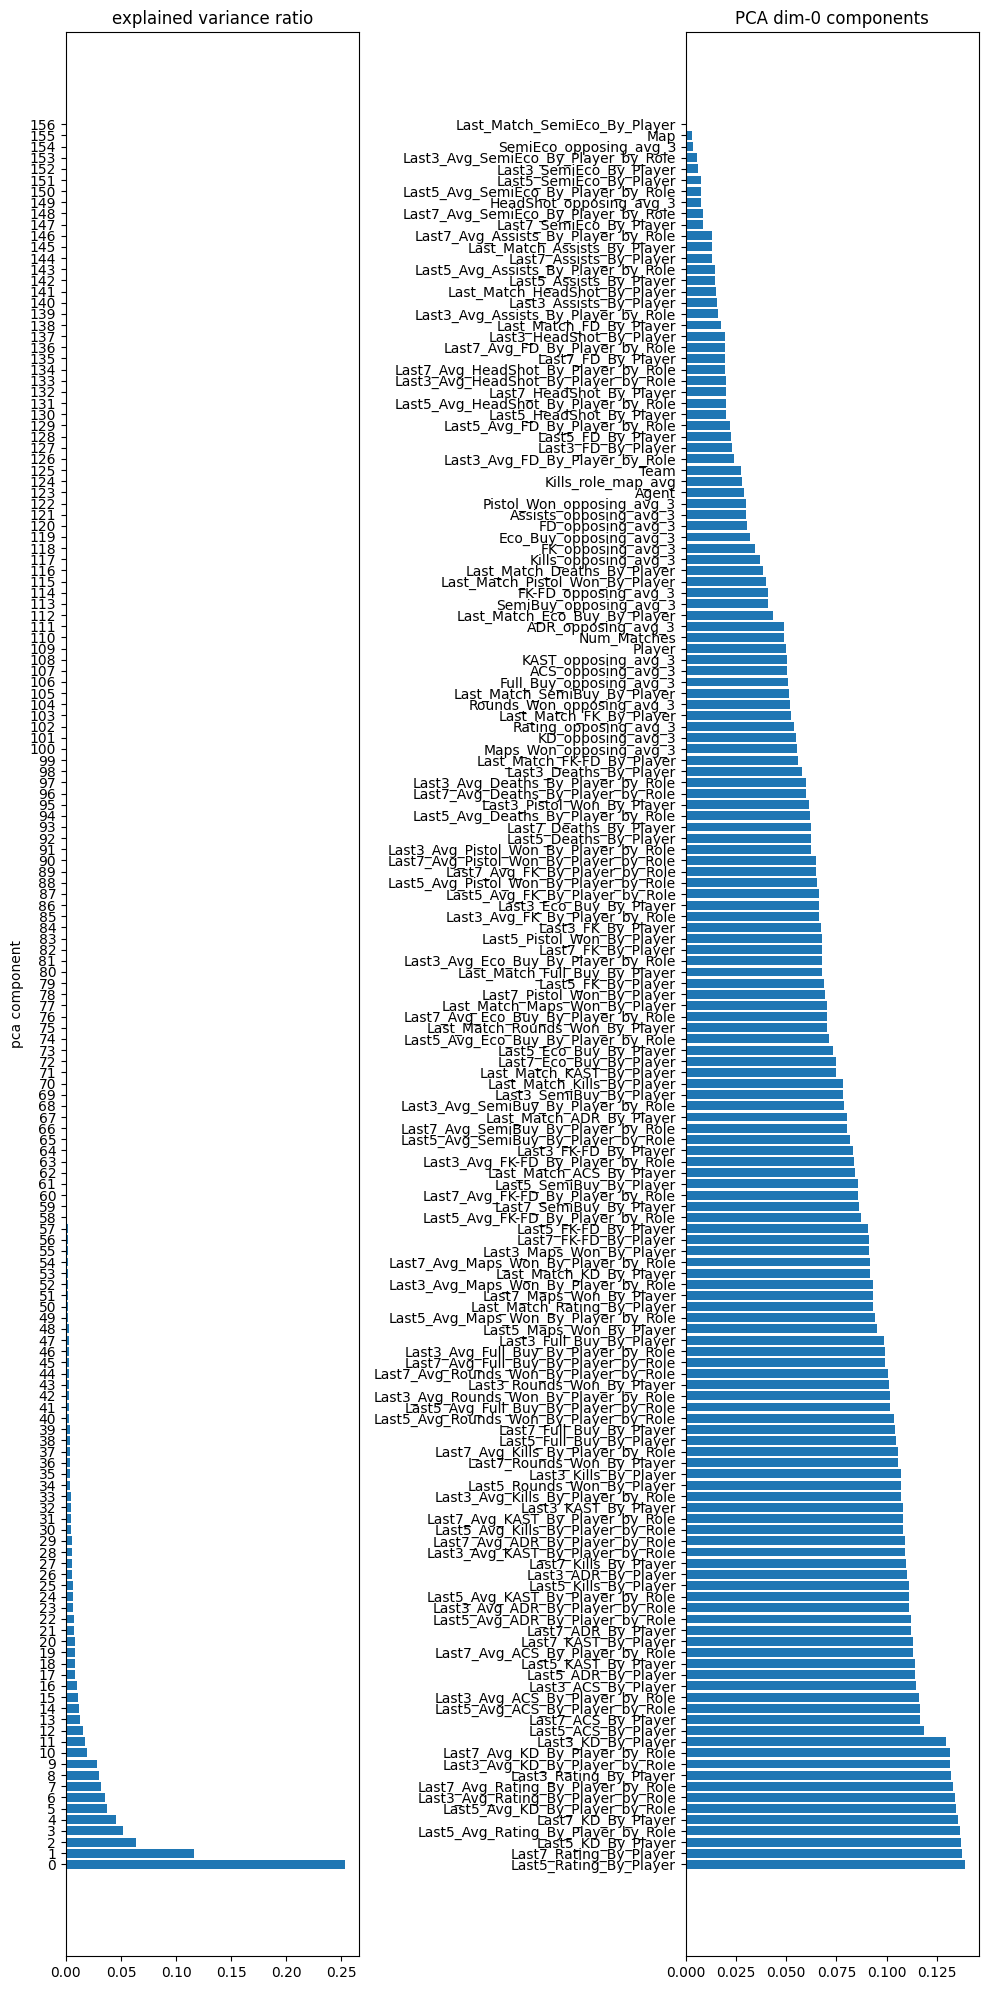

In [28]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
vlr_pca = pca.fit_transform(train_numeric_dataset)
interval_columns= X_train.columns

idx = pca.explained_variance_ratio_.argsort()[::-1]
ticks = range(pca.n_components_)
f, ax = plt.subplots(1, 2,  figsize=(10,20))
ax[0].barh(ticks, pca.explained_variance_ratio_[idx])
ax[0].set_title('explained variance ratio')
ax[0].set_ylabel('pca component')
ax[0].set_yticks(ticks)
comp_idx = abs(pca.components_[0]).argsort()[::-1]
ax[1].barh(ticks, abs(pca.components_[0, comp_idx]))
plt.yticks(ticks, np.array(interval_columns)[comp_idx])
ax[1].set_title('PCA dim-0 components')
plt.tight_layout()

Apply PCA

In [37]:
#Encodes categorical features into numerical
import category_encoders as ce
Encoder = ce.CatBoostEncoder(cols=categorical_features)

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

# Transform your original data using the selected components
from sklearn.decomposition import PCA
pca = PCA(n_components = 65)

#For each set, transform categorical features into numerical features and then scale all the numerical features

train_numeric_dataset = Encoder.fit_transform(X_train, y_train)
train_numeric_dataset = scaler.fit_transform(train_numeric_dataset)
train_numeric_dataset = pca.fit_transform(train_numeric_dataset)


validation_numeric_dataset = Encoder.transform(X_valid)
validation_numeric_dataset = scaler.transform(validation_numeric_dataset)
validation_numeric_dataset = pca.transform(validation_numeric_dataset)


testing_numeric_dataset = Encoder.transform(X_test)
testing_numeric_dataset = scaler.transform(testing_numeric_dataset)
testing_numeric_dataset = pca.transform(testing_numeric_dataset)

train_numeric_dataset

array([[-1.75103265, -1.98907193,  1.43644671, ..., -0.28964626,
        -0.38551603, -0.10629442],
       [-3.9641546 , -2.3005916 , -1.10603267, ...,  0.26933697,
         0.34913909,  0.33710186],
       [31.57826553, -3.54747653, -6.06253351, ...,  0.11967306,
         0.19952853, -0.09436743],
       ...,
       [ 5.66727947, -3.53287557,  0.39853736, ..., -0.22461043,
         0.48266459,  0.3399756 ],
       [ 6.42089149,  1.71483687, -2.10937648, ...,  0.38207859,
         0.13005729, -0.38695467],
       [-0.0861415 , -3.84333299, -4.26623333, ...,  0.20750193,
         0.46253374,  0.29591814]])

In [38]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

models = [
    ("Linear Regression", LinearRegression()),
    ("Bayesian Ridge", BayesianRidge()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

results = []

for model_name, model in models:
    model.fit(train_numeric_dataset, y_train)
    predictions = model.predict(validation_numeric_dataset)
    train_score = model.score(train_numeric_dataset, y_train)
    validation_score = model.score(validation_numeric_dataset, y_valid)
    mse = metrics.mean_squared_error(y_valid, predictions)
    mae = metrics.mean_absolute_error(y_valid, predictions)
    results.append([model_name, train_score, validation_score, mae, mse])

# Create a DataFrame to store the results
columns = ["Model", "Train R2 Score", "Validation R2 Score", "Mean Absolute Error", "Mean Squared Error"]
results_df = pd.DataFrame(results, columns=columns)

print(results_df)

               Model  Train R2 Score  Validation R2 Score  \
0  Linear Regression        0.131851             0.151400   
1     Bayesian Ridge        0.131816             0.151070   
2  Gradient Boosting        0.148651             0.129526   

   Mean Absolute Error  Mean Squared Error  
0             3.956489           24.905930  
1             3.957182           24.915618  
2             4.005968           25.547916  


In this case, it is better to leave our data alone rather than applying PCA to reduce the number of features